In [3]:
import os
import sys
os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON_OPTS"]="notebook --no-browser"
os.environ["JAVA_HOME"] = "/usr/java/jdk1.8.0_161/jre"
os.environ["SPARK_HOME"] = "/home/ec2-user/spark-2.4.4-bin-hadoop2.7"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
sys.path.insert(0, os.environ["PYLIB"] + "/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] + "/pyspark.zip")

In [4]:
# let us import the pyspark
import pyspark

from pyspark import SparkContext

sc= SparkContext()

In [5]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [6]:
# let us check where are we

import os
os.getcwd()

'/home/ec2-user'

In [7]:
# We are following word count demonstration using pyspark

In [8]:
# let us load the data

word_rdd = sc.textFile('wordinput.txt')

In [9]:
word_rdd

wordinput.txt MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [10]:
# let us see the content of this rdd

word_rdd.collect()

['i am the earth',
 'i am the four winds blowing',
 'i am the forest green',
 'i am the earth']

In [ ]:
# first let us split it


'i am the earth'.split(' ')=> ['i','am','the','earth']
'i am the four winds blowing'.split(' ')=> ['i','am','the','four','winds','blowing']


# result of map
[['i','am','the','earth'],['i','am','the','four','winds','blowing']]

# result of flatmap
['i','am','the','earth','i','am','the','four','winds','blowing']

In [11]:
rdd0 = word_rdd.flatMap(lambda line:  line.split(' '))

In [12]:
rdd0.collect()

['i',
 'am',
 'the',
 'earth',
 'i',
 'am',
 'the',
 'four',
 'winds',
 'blowing',
 'i',
 'am',
 'the',
 'forest',
 'green',
 'i',
 'am',
 'the',
 'earth']

In [ ]:
('i',1) , ('am',1) , ('the',1)

In [13]:
rdd1= rdd0.map(lambda item : (item,1))

In [14]:
rdd1.collect()

[('i', 1),
 ('am', 1),
 ('the', 1),
 ('earth', 1),
 ('i', 1),
 ('am', 1),
 ('the', 1),
 ('four', 1),
 ('winds', 1),
 ('blowing', 1),
 ('i', 1),
 ('am', 1),
 ('the', 1),
 ('forest', 1),
 ('green', 1),
 ('i', 1),
 ('am', 1),
 ('the', 1),
 ('earth', 1)]

In [15]:
#let us visualize
# let us assume the key is 'am'


#(am,1)
#(am,2)
#(am,3)
#(am,4)

# a , b
# 1   2
# 3   3
# 6   4
# 10

#return a
# for key 'm' what is a 10  => ('am',10)


rdd2=rdd1.reduceByKey(lambda a,b : a+b)

In [16]:
rdd2.collect()

[('i', 4),
 ('am', 4),
 ('earth', 2),
 ('four', 1),
 ('green', 1),
 ('the', 4),
 ('winds', 1),
 ('blowing', 1),
 ('forest', 1)]

In [ ]:
#does agg. based on key

In [ ]:
# we want to find the wordcount.

# logic/algo : we will split each word and convert it into a key/value pair

# for eg.  (i,1) , (am,1) , (the,1)

In [ ]:
# Log Data Analysis

In [17]:
rdd = sc.textFile('access_log')

In [18]:
# let us see how many records are tehre

rdd.count()

4477843

In [19]:
# let us see the sample data

rdd.take(5)

['10.223.157.186 - - [15/Jul/2009:14:58:59 -0700] "GET / HTTP/1.1" 403 202',
 '10.223.157.186 - - [15/Jul/2009:14:58:59 -0700] "GET /favicon.ico HTTP/1.1" 404 209',
 '10.223.157.186 - - [15/Jul/2009:15:50:35 -0700] "GET / HTTP/1.1" 200 9157',
 '10.223.157.186 - - [15/Jul/2009:15:50:35 -0700] "GET /assets/js/lowpro.js HTTP/1.1" 200 10469',
 '10.223.157.186 - - [15/Jul/2009:15:50:35 -0700] "GET /assets/css/reset.css HTTP/1.1" 200 1014']

In [ ]:
10.1.181.142 # let us see how many request this ip addr has sent over the complete period(1year)

In [21]:
# among all lines in dataset

# i am fetching only those lines where the ip address 10.1.181.142 is available

In [22]:
rdd1 = rdd.filter(lambda line : '10.1.181.142' in line)

In [23]:
rdd1.take(5)

['10.1.181.142 - - [07/Jan/2010:02:28:47 -0800] "GET / HTTP/1.1" 200 4095',
 '10.1.181.142 - - [07/Jan/2010:02:28:47 -0800] "GET /favicon.ico HTTP/1.1" 200 1406',
 '10.1.181.142 - - [07/Jan/2010:02:28:47 -0800] "GET /assets/css/combined.css HTTP/1.1" 200 6373',
 '10.1.181.142 - - [07/Jan/2010:02:28:47 -0800] "GET /assets/js/javascript_combined.js HTTP/1.1" 200 20404',
 '10.1.181.142 - - [07/Jan/2010:02:28:48 -0800] "GET /assets/img/play_icon.png HTTP/1.1" 200 10827']

In [24]:
#the number of rows = number of request to server

rdd1.count()

10686

In [ ]:
# we did this request count for 1 IP, let us do it for all the IP(s)

In [ ]:
# let us extract IP address(s) from rdd

In [25]:
#logic
'10.1.181.142 - - [07/Jan/2010:02:28:47 -0800] "GET / HTTP/1.1" 200 4095'.split(' ')[0]

'10.1.181.142'

In [26]:
onlyIPRDD = rdd.map(lambda line : line.split(' ')[0])

In [27]:
onlyIPRDD.take(10)

['10.223.157.186',
 '10.223.157.186',
 '10.223.157.186',
 '10.223.157.186',
 '10.223.157.186',
 '10.223.157.186',
 '10.223.157.186',
 '10.223.157.186',
 '10.223.157.186',
 '10.223.157.186']

In [28]:
onlyIPRDD.count()

4477843

In [29]:
# let us follow the same word count logic here.



In [30]:
ipkvpair = onlyIPRDD.map(lambda ip : (ip,1))

In [31]:
ipkvpair.take(10)

[('10.223.157.186', 1),
 ('10.223.157.186', 1),
 ('10.223.157.186', 1),
 ('10.223.157.186', 1),
 ('10.223.157.186', 1),
 ('10.223.157.186', 1),
 ('10.223.157.186', 1),
 ('10.223.157.186', 1),
 ('10.223.157.186', 1),
 ('10.223.157.186', 1)]

In [32]:
# let us reduce by key


ipCount= ipkvpair.reduceByKey(lambda a,b : a+b)

In [33]:
ipCount.take(10)

[('10.82.30.199', 251),
 ('10.150.176.47', 12),
 ('10.73.238.200', 1162),
 ('10.55.240.134', 15),
 ('10.35.142.161', 215),
 ('10.243.164.90', 3),
 ('10.32.150.241', 17),
 ('10.76.90.213', 74),
 ('10.124.93.38', 691),
 ('10.203.135.85', 15)]

In [38]:
# let us learn how we can sort this data by value i.e RequestCount

#logic 

rddTuple=('10.82.30.199', 251)
rddTuple[1]

251

In [35]:
ip_sorted = ipCount.sortBy(lambda rddTuple : rddTuple[1],ascending=False)

In [37]:
ip_sorted.take(20)

[('10.216.113.172', 158614),
 ('10.220.112.1', 51942),
 ('10.173.141.213', 47503),
 ('10.240.144.183', 43592),
 ('10.41.69.177', 37554),
 ('10.169.128.121', 22516),
 ('10.211.47.159', 20866),
 ('10.96.173.111', 19667),
 ('10.203.77.198', 18878),
 ('10.31.77.18', 18721),
 ('10.118.250.30', 18282),
 ('10.56.48.40', 17850),
 ('10.194.74.106', 16806),
 ('10.53.149.243', 16709),
 ('10.50.199.54', 15717),
 ('10.247.111.104', 15583),
 ('10.104.62.79', 14807),
 ('10.200.184.212', 14420),
 ('10.152.195.138', 13775),
 ('10.238.101.239', 12450)]

In [39]:
# let us extract only those users (ip addr) which are hitting the server most

rdd_heavy_users = ip_sorted.filter(lambda iptuple : iptuple[1]>20000)

In [41]:
rdd_heavy_users.collect()

[('10.216.113.172', 158614),
 ('10.220.112.1', 51942),
 ('10.173.141.213', 47503),
 ('10.240.144.183', 43592),
 ('10.41.69.177', 37554),
 ('10.169.128.121', 22516),
 ('10.211.47.159', 20866)]

In [42]:
rdd_dict = dict(rdd_heavy_users.collect())

In [43]:
rdd_dict

{'10.216.113.172': 158614,
 '10.220.112.1': 51942,
 '10.173.141.213': 47503,
 '10.240.144.183': 43592,
 '10.41.69.177': 37554,
 '10.169.128.121': 22516,
 '10.211.47.159': 20866}

In [44]:
import pandas as pd

In [46]:
df = pd.DataFrame(rdd_dict.items(),columns=['IP','RequestCount'])
df

,IP,RequestCount
0,10.216.113.172,158614
1,10.220.112.1,51942
2,10.173.141.213,47503
3,10.240.144.183,43592
4,10.41.69.177,37554
5,10.169.128.121,22516
6,10.211.47.159,20866


In [47]:
import seaborn as sns

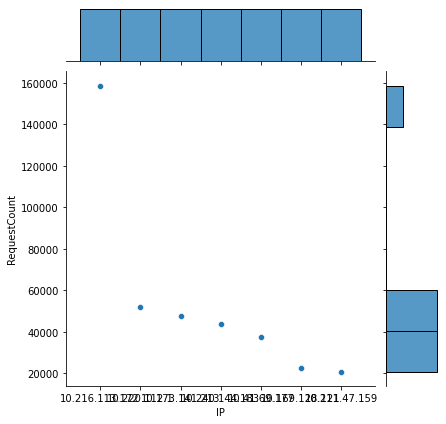

In [48]:
sns.jointplot(x='IP',y='RequestCount',data=df)